In [84]:
import sys
import os
sys.path.append(os.path.abspath('..'))

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from geopy.distance import great_circle

In [62]:
from src import Root
root = Root()

In [63]:
root.lib.jupyter_settings()

In [64]:
data = root.read.origins.dataframe

In [65]:
data.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7937,-118.07,33.83,17.0,4822.0,1168.0,3868.0,1117.0,2.5978,142900.0,<1H OCEAN
9612,-120.47,37.29,16.0,749.0,222.0,1277.0,224.0,1.2054,60900.0,INLAND
18654,-121.96,36.98,16.0,4907.0,1117.0,2265.0,1048.0,2.6757,229200.0,NEAR OCEAN
1323,-121.88,38.03,52.0,1225.0,250.0,725.0,231.0,2.0000,101400.0,INLAND
7293,-118.23,33.98,35.0,1366.0,496.0,2160.0,497.0,2.2059,150000.0,<1H OCEAN
12521,-121.47,38.56,52.0,1532.0,408.0,782.0,369.0,1.8911,85900.0,INLAND
7663,-118.22,33.83,43.0,1426.0,272.0,871.0,276.0,3.7083,175200.0,<1H OCEAN
10758,-117.86,33.65,4.0,3618.0,767.0,1326.0,714.0,5.4284,500001.0,<1H OCEAN
7011,-118.07,33.97,32.0,3400.0,826.0,3017.0,793.0,2.4607,155600.0,<1H OCEAN
3175,-119.83,36.37,25.0,1549.0,269.0,819.0,272.0,2.7159,101400.0,INLAND


In [66]:
#predict the median house value
data = data.rename(columns={'median_house_value': 'target'})

In [67]:
data.shape

(20640, 10)

In [68]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: xlabel='target', ylabel='Count'>

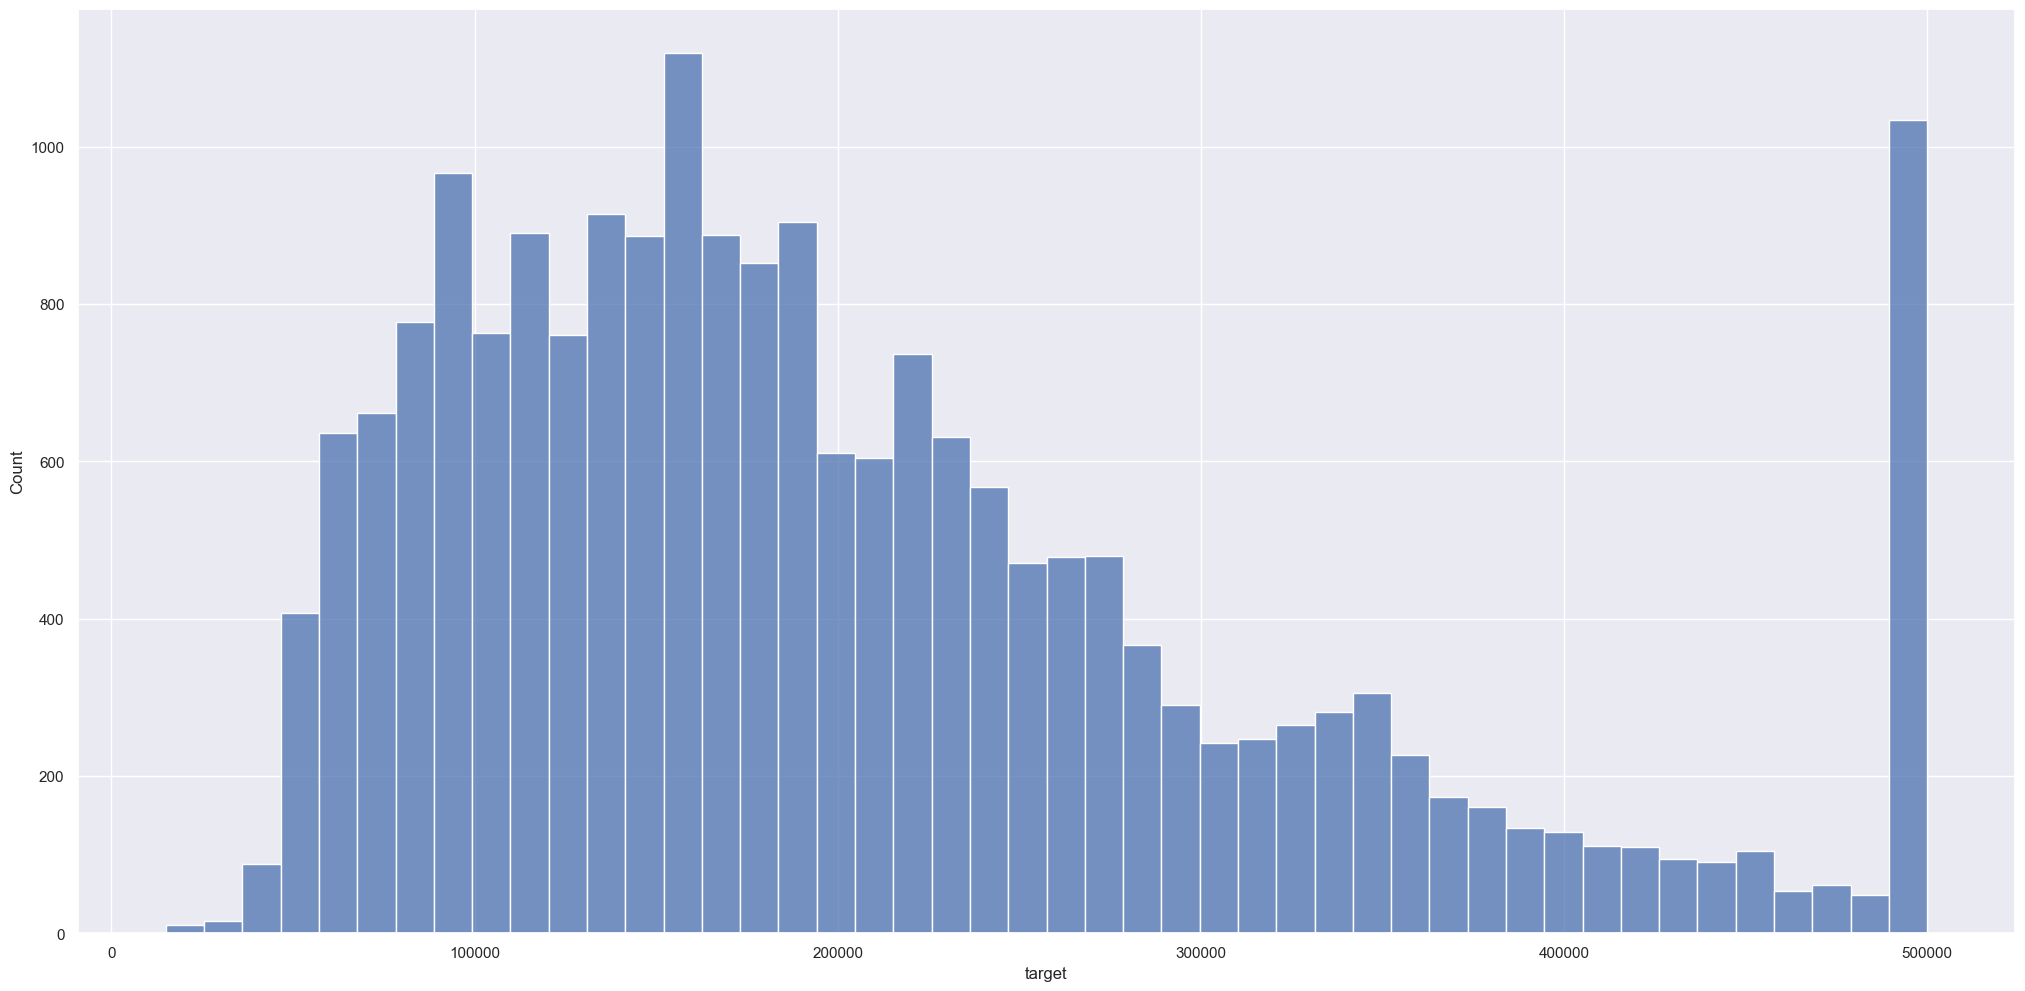

In [69]:
sns.histplot(data["target"])

<Axes: xlabel='target', ylabel='Count'>

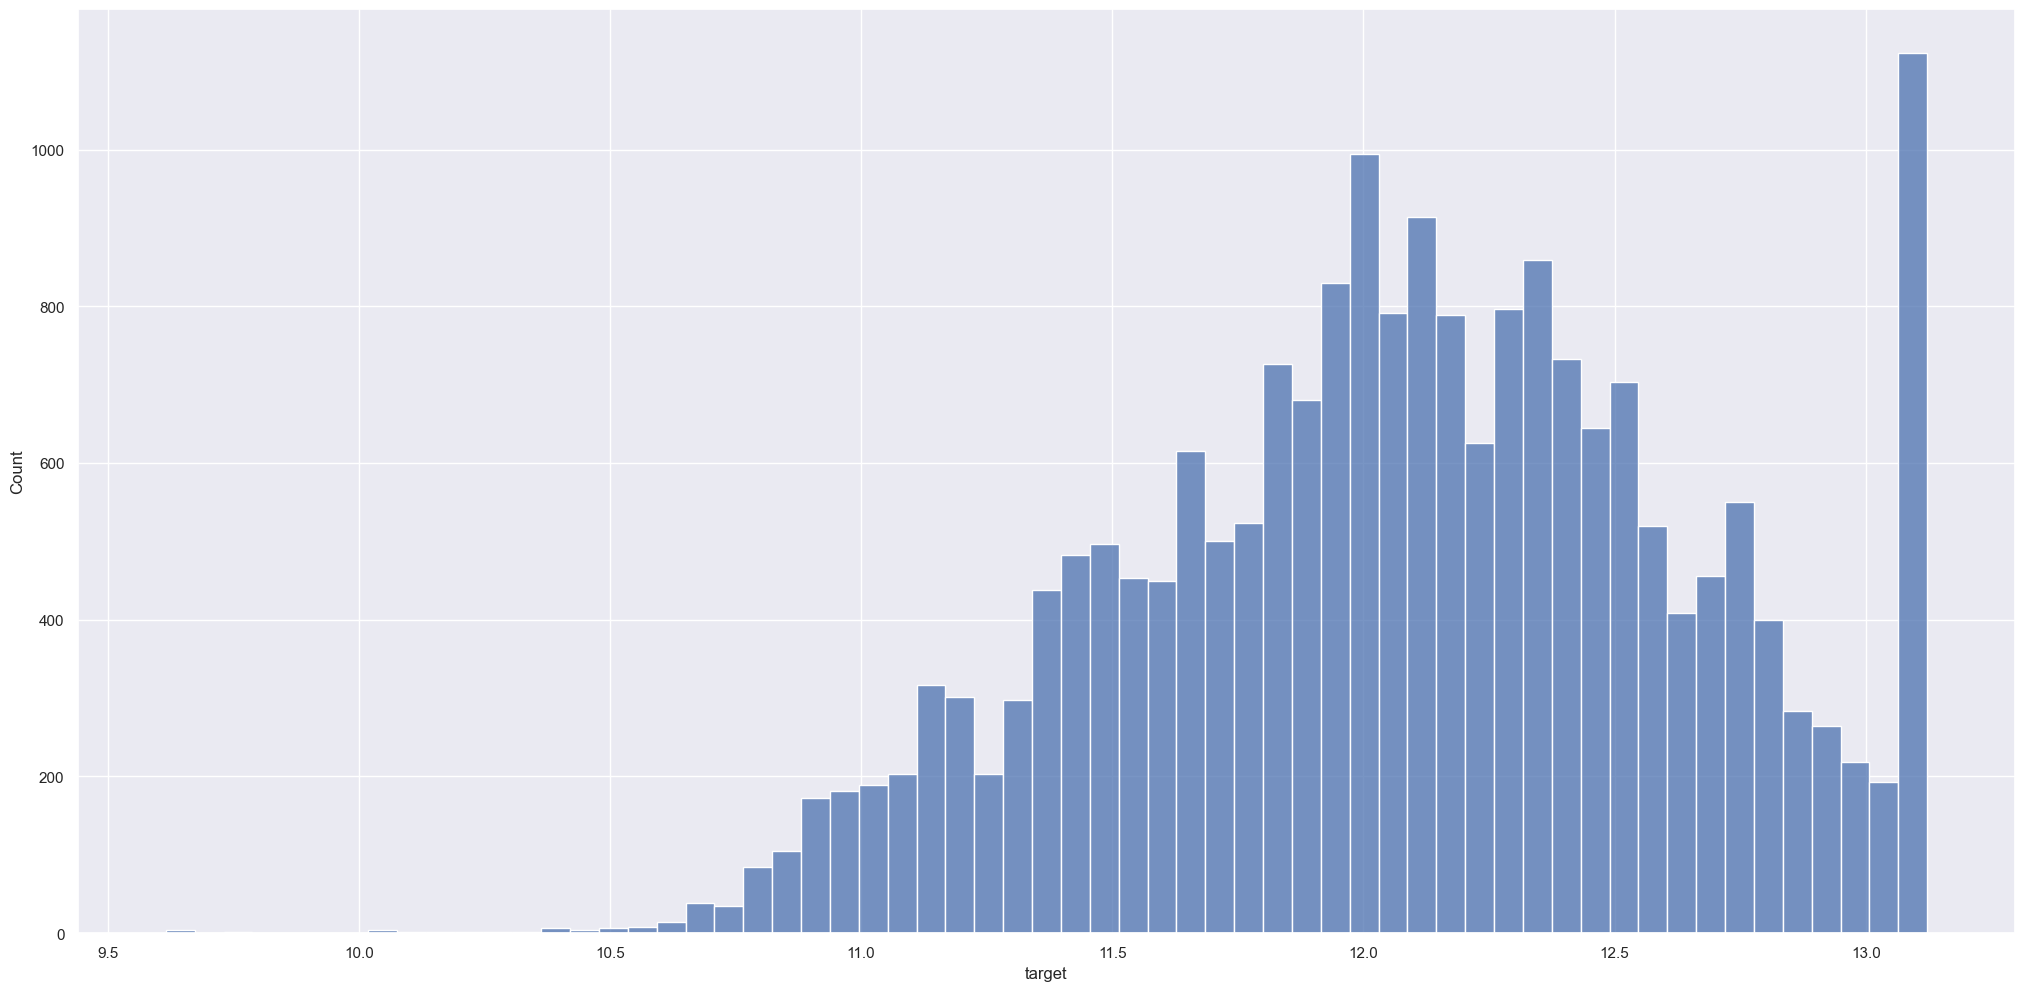

In [70]:
sns.histplot(np.log1p(data["target"]))

In [71]:
data.query("target > 500000").sample(30)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,target,ocean_proximity
17109,-122.21,37.46,48.0,2560.0,322.0,921.0,301.0,10.8758,500001.0,NEAR OCEAN
15195,-116.99,33.01,11.0,1412.0,185.0,529.0,166.0,7.7517,500001.0,<1H OCEAN
10682,-117.76,33.53,24.0,2105.0,346.0,712.0,332.0,10.6349,500001.0,<1H OCEAN
10796,-117.91,33.62,35.0,2426.0,359.0,937.0,387.0,9.2175,500001.0,<1H OCEAN
18355,-122.13,37.37,30.0,2139.0,260.0,742.0,242.0,11.8060,500001.0,NEAR BAY
4245,-118.32,34.13,34.0,1856.0,273.0,540.0,264.0,4.0833,500001.0,<1H OCEAN
10729,-117.87,33.60,20.0,3212.0,572.0,1064.0,526.0,6.6155,500001.0,<1H OCEAN
3557,-118.56,34.24,23.0,2980.0,362.0,1208.0,378.0,8.1714,500001.0,<1H OCEAN
11514,-118.07,33.72,32.0,1179.0,250.0,369.0,209.0,5.1824,500001.0,NEAR OCEAN
18294,-122.10,37.39,35.0,2471.0,349.0,881.0,342.0,7.6229,500001.0,NEAR BAY


In [72]:
data.query("target >= 500000").shape[0] / data.shape[0]  

0.04806201550387597

In [73]:
high_value = data.query("target >= 500000")
rest = data.query("target < 500000")

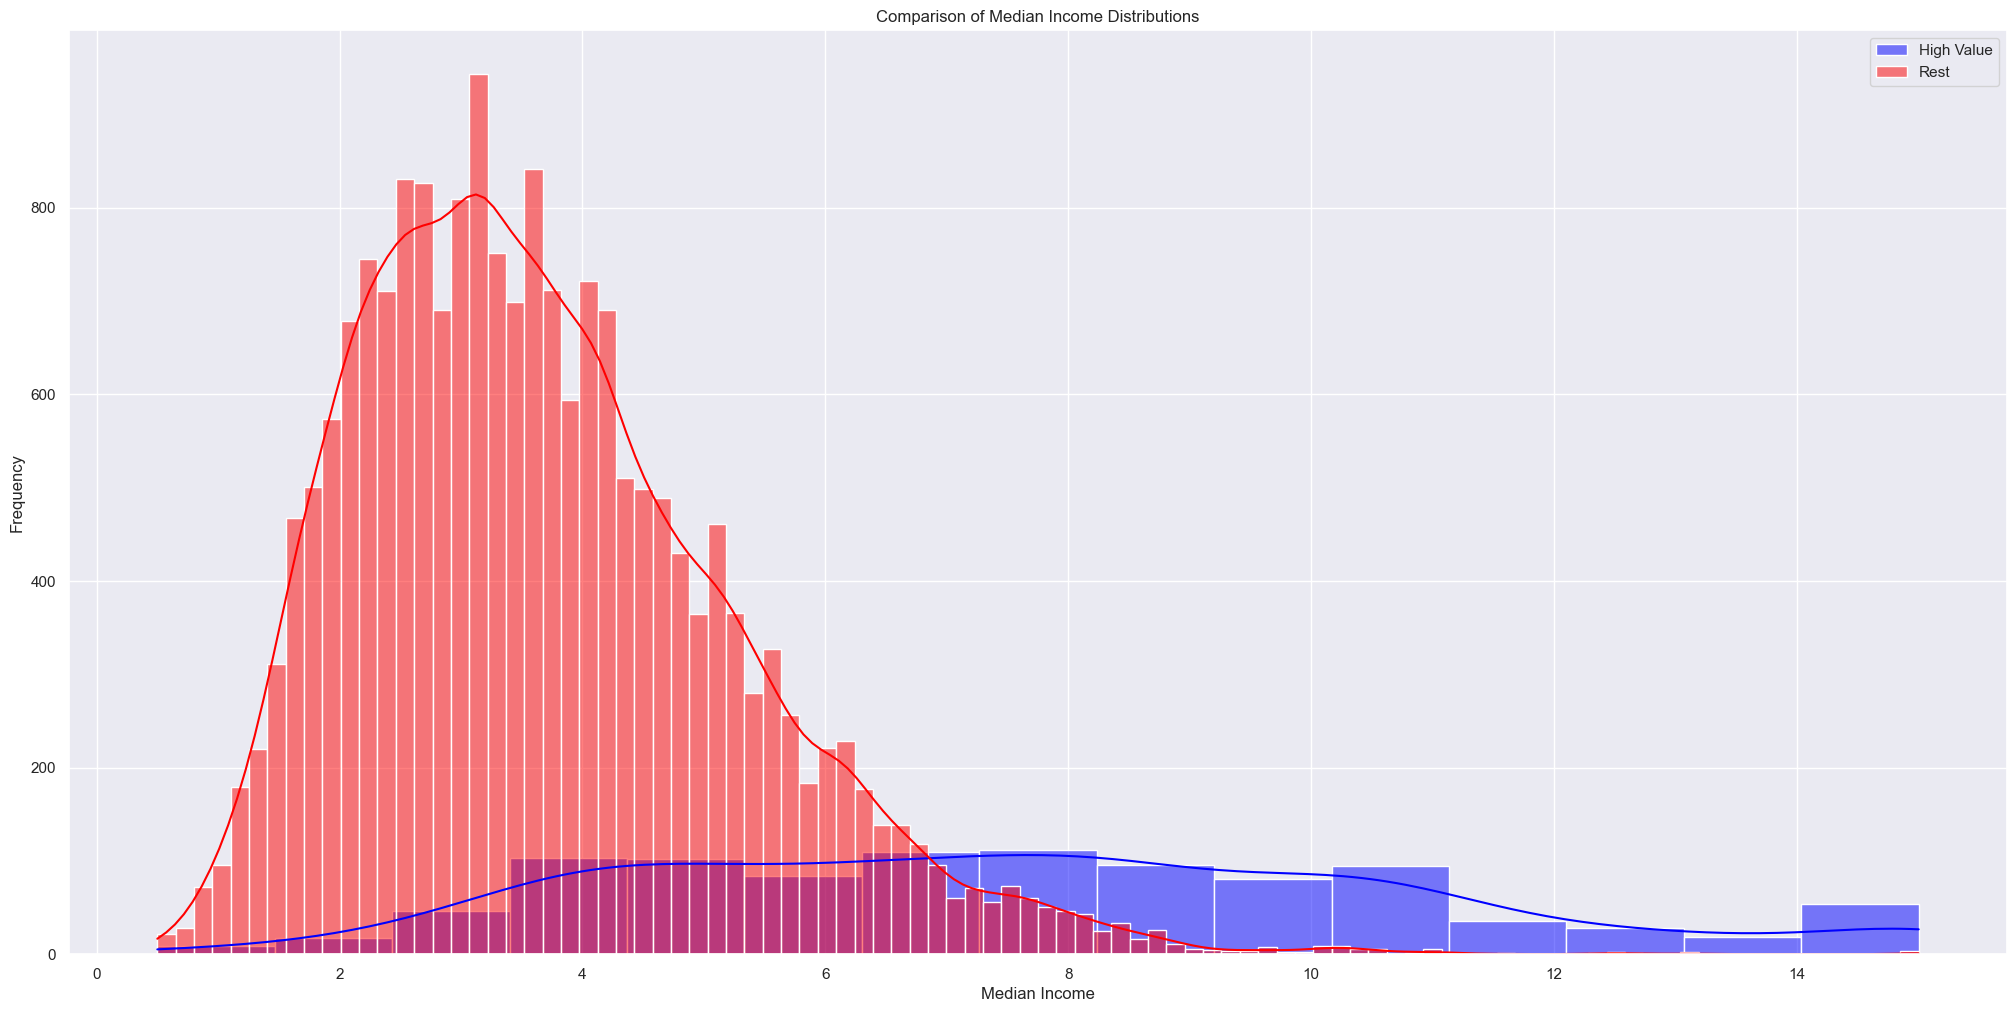

In [74]:
sns.histplot(high_value['median_income'], color='blue', label='High Value', kde=True, alpha=0.5)
sns.histplot(rest['median_income'], color='red', label='Rest', kde=True, alpha=0.5)

plt.title('Comparison of Median Income Distributions')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [75]:
high_value.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,target
count,992.000000,992.000000,992.000000,992.000000,985.000000,992.000000,992.000000,992.000000,992.000000
mean,-119.714808,35.235514,33.916331,2941.285282,502.819289,1110.717742,466.803427,7.718279,500000.972782
std,1.954213,1.789526,13.031440,2144.906809,396.198095,809.597160,359.277806,3.270615,0.162799
min,-122.640000,32.680000,2.000000,8.000000,1.000000,13.000000,1.000000,0.499900,500000.000000
25%,-122.120000,33.977500,25.000000,1662.500000,269.000000,635.750000,253.000000,5.112825,500001.000000
50%,-118.480000,34.130000,34.000000,2501.000000,403.000000,925.500000,375.000000,7.562450,500001.000000
75%,-118.320000,37.402500,45.000000,3532.750000,610.000000,1338.750000,577.000000,10.074725,500001.000000
max,-116.430000,38.910000,52.000000,18132.000000,5419.000000,7431.000000,4930.000000,15.000100,500001.000000


In [76]:
rest.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,target
count,19648.000000,19648.000000,19648.000000,19648.000000,19448.000000,19648.000000,19648.000000,19648.000000,19648.000000
mean,-119.562378,35.651872,28.373066,2620.337693,539.645825,1441.368485,501.192488,3.676411,192055.328583
std,2.005760,2.150066,12.504050,2182.371939,422.553057,1144.075196,383.391367,1.570602,97110.854998
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.760000,33.930000,18.000000,1438.000000,297.000000,796.000000,282.000000,2.526300,116475.000000
50%,-118.500000,34.270000,28.000000,2111.000000,436.000000,1179.000000,411.000000,3.449050,173600.000000
75%,-117.990000,37.730000,37.000000,3121.000000,648.000000,1746.250000,606.000000,4.582500,247900.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,499100.000000


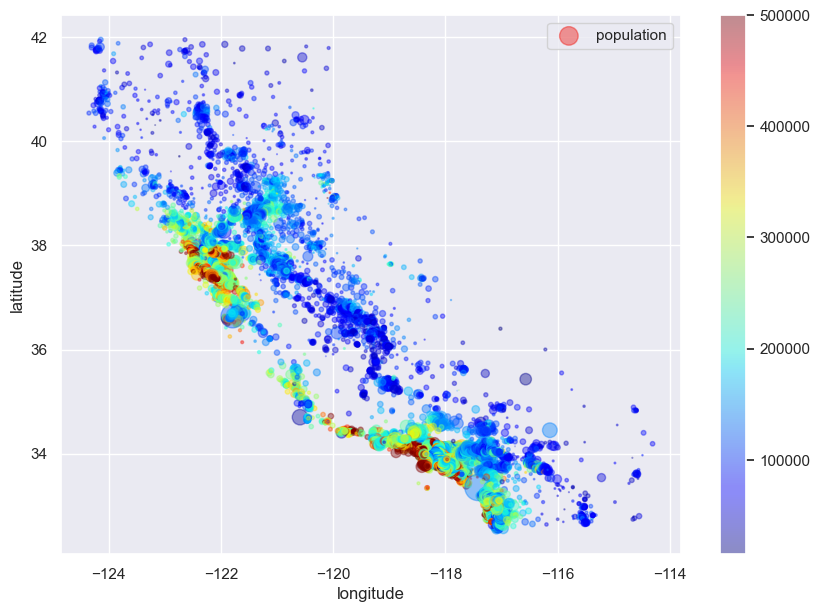

In [77]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=data["population"]/100, label="population", figsize=(10,7),
             c=data["target"], cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
plt.show()

In [78]:
corr = data.corr(numeric_only= True)

In [79]:
corr["target"].sort_values(ascending= False)

target                1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: target, dtype: float64

In [80]:
data["total_rooms_per_households"] = data["total_rooms"] / data["households"]
data["total_bedrooms_per_households"] = data["total_bedrooms"] / data["households"]
data["income_per_household"] = data["median_income"] / data["households"]


In [81]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,target,ocean_proximity,total_rooms_per_households,total_bedrooms_per_households,income_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,0.066073
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,0.007295
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,0.041002
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,0.025768
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,0.014850


In [82]:
corr = data.corr(numeric_only= True)

In [83]:
corr["target"].sort_values(ascending= False)

target                           1.000000
median_income                    0.688075
total_rooms_per_households       0.151948
total_rooms                      0.134153
housing_median_age               0.105623
households                       0.065843
income_per_household             0.057479
total_bedrooms                   0.049686
population                      -0.024650
longitude                       -0.045967
total_bedrooms_per_households   -0.046739
latitude                        -0.144160
Name: target, dtype: float64

In [ ]:
df = data.copy()
IMPORTANT_CENTERS = {
    'los_angeles': (34.0522, -118.2437),
    'san_francisco': (37.7749, -122.4194),
    'san_diego': (32.7157, -117.1611),
    'sacramento': (38.5816, -121.4944),  # State capital
    'silicon_valley': (37.3875, -122.0575),  # Palo Alto as proxy
    'fresno': (36.7378, -119.7871),  # Major Central Valley city
    'santa_barbara': (34.4208, -119.6982),
    'san_jose': (37.3382, -121.8863),
    'oakland': (37.8044, -122.2711),
    'anaheim': (33.8366, -117.9143),  # Disneyland location
    'golden_gate_bridge': (37.8199, -122.4783),
    'yosemite_valley': (37.8651, -119.5383),  # Yosemite National Park
    'death_valley': (36.5323, -116.9325),  # Death Valley National Park
    'big_sur': (36.2704, -121.8080)  # Scenic coastal area
}

def calculate_distances(row, centers):
    """Calculate distances from a property to all important centers."""
    property_coords = (row['latitude'], row['longitude'])
    distances = {}
    for name, center_coords in centers.items():
        distances[f'distance_to_{name}'] = great_circle(property_coords, center_coords).miles
    return pd.Series(distances)

distance_df = df.apply(lambda x: calculate_distances(x, IMPORTANT_CENTERS), axis=1)

# Combine with original dataframe
df_with_distances = pd.concat([df, distance_df], axis=1)

   distance_to_los_angeles  distance_to_san_francisco  distance_to_san_diego  distance_to_sacramento  distance_to_silicon_valley  distance_to_fresno  distance_to_santa_barbara  distance_to_san_jose  distance_to_oakland  distance_to_anaheim  distance_to_golden_gate_bridge  distance_to_yosemite_valley  distance_to_death_valley  distance_to_big_sur
0               345.812943                  12.632209             457.021802               62.799738                   35.313272          155.720110                 277.596661             41.895928             5.684505           369.299182                       14.168798                   146.806119                305.980778           113.619343
1               344.415282                  12.370316             455.614441               63.537971                   33.836115          154.564353                 276.132820             40.416760             4.746992           367.908961                       14.363875                   146.277435    

In [87]:
df_with_distances.sample(15)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,target,ocean_proximity,total_rooms_per_households,total_bedrooms_per_households,income_per_household,distance_to_los_angeles,distance_to_san_francisco,distance_to_san_diego,distance_to_sacramento,distance_to_silicon_valley,distance_to_fresno,distance_to_santa_barbara,distance_to_san_jose,distance_to_oakland,distance_to_anaheim,distance_to_golden_gate_bridge,distance_to_yosemite_valley,distance_to_death_valley,distance_to_big_sur
8691,-118.32,33.86,34.0,495.0,90.0,269.0,93.0,6.4391,252300.0,<1H OCEAN,5.322581,0.967742,0.069238,13.981175,354.764575,103.589955,371.062006,321.596726,215.352690,87.822617,312.827706,351.002747,23.336398,359.224628,285.002074,200.563623,258.124813
17150,-122.20,37.43,40.0,2223.0,412.0,1050.0,417.0,5.2421,444500.0,NEAR OCEAN,5.330935,0.988010,0.012571,321.950447,26.685633,432.616135,88.354829,8.353854,141.330357,250.619169,18.353125,26.159606,345.698914,30.946336,148.678764,297.233587,83.000115
14066,-117.12,32.75,20.0,1406.0,413.0,850.0,412.0,2.3261,114600.0,NEAR OCEAN,3.412621,1.002427,0.005646,110.887367,457.993381,3.364933,471.700733,424.865295,314.360156,188.000450,416.031005,454.117327,87.981564,462.457417,378.769365,261.549120,361.023502
12204,-117.16,33.57,2.0,20391.0,3245.0,7132.0,2716.0,3.9443,187300.0,<1H OCEAN,7.507732,1.194772,0.001452,70.571962,414.045559,59.026544,422.354857,381.335653,264.415812,156.826008,372.112538,409.576610,47.107939,418.517822,325.339973,205.079328,322.656850
1908,-120.03,38.89,15.0,3042.0,588.0,918.0,336.0,3.8333,118800.0,INLAND,9.053571,1.750000,0.011409,348.661354,150.679984,455.817956,81.749516,151.375219,149.292569,309.338792,147.230892,142.729836,368.433475,151.858649,75.656160,234.922933,205.507937
15031,-117.02,32.79,36.0,2211.0,384.0,868.0,329.0,4.0491,147900.0,<1H OCEAN,6.720365,1.167173,0.012307,112.182824,459.566146,9.673645,472.264189,426.489631,314.714433,190.902783,417.586847,455.589030,88.855922,464.033618,378.255952,258.616084,363.366126
3114,-117.66,35.61,5.0,5735.0,932.0,2623.0,862.0,4.8494,87200.0,INLAND,6.653132,1.081206,0.005626,112.608823,303.096359,201.999907,294.579601,273.343183,141.933647,141.605328,263.391461,296.973519,123.378202,307.400143,187.323047,75.574236,236.463012
16224,-121.33,37.98,36.0,3113.0,576.0,1746.0,544.0,3.4625,84600.0,INLAND,5.722426,1.058824,0.006365,321.507882,61.079085,432.887403,42.512188,57.081553,120.604328,262.194274,53.779965,52.729262,344.167802,63.575259,97.975097,261.669652,121.021101
13597,-117.28,34.09,44.0,376.0,NaN,273.0,107.0,2.2917,90800.0,INLAND,3.514019,NaN,0.021418,55.217088,383.929018,95.202411,388.909467,351.614211,231.061873,139.974133,342.180363,379.100721,40.345807,388.390948,289.763939,169.880056,296.736505
13153,-121.60,36.88,21.0,3416.0,624.0,1862.0,595.0,4.7813,241500.0,<1H OCEAN,5.741176,1.048739,0.008036,271.707663,76.483860,382.278443,117.710869,43.181071,100.766091,200.666838,35.371301,73.744561,295.499874,80.897210,132.086553,259.634015,43.671946


In [88]:
data = df_with_distances.copy()

corr = data.corr(numeric_only= True)
corr["target"].sort_values(ascending= False)

target                            1.000000
median_income                     0.688075
total_rooms_per_households        0.151948
total_rooms                       0.134153
distance_to_yosemite_valley       0.106669
housing_median_age                0.105623
households                        0.065843
distance_to_sacramento            0.060178
income_per_household              0.057479
total_bedrooms                    0.049686
distance_to_fresno                0.048392
distance_to_death_valley          0.045430
distance_to_oakland              -0.023786
population                       -0.024650
distance_to_golden_gate_bridge   -0.027705
distance_to_san_francisco        -0.030247
distance_to_san_jose             -0.041109
distance_to_silicon_valley       -0.045552
longitude                        -0.045967
total_bedrooms_per_households    -0.046739
distance_to_san_diego            -0.092511
distance_to_big_sur              -0.098191
distance_to_anaheim              -0.117118
distance_to